# Discrete Anomaly Detection

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
logs = pd.read_csv('curriculum-access.txt', 
                    engine='python',
                    header=None,
                    index_col=False,
                    names = ['date', 'time', 'page', 'user', 'cohort', 'IP'],
                    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                    na_values='"-"')
logs

,date,time,page,user,cohort,IP
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


## Through research we found the columns names of this data.

## Next lets combine data and time into one column

In [3]:
logs['date_time'] = logs.date + ' ' + logs.time
logs = logs.drop(columns = ['date', 'time'])
logs

,page,user,cohort,IP,date_time
0,/,1,8.0,98.106.20.62,2018-01-26 09:55:03
1,java-ii,1,8.0,98.106.20.62,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,98.106.20.62,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,98.106.20.62,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,98.106.20.62,2018-01-26 09:56:24
...,...,...,...,...,...
543591,java-ii/file-io,602,56.0,48.188.241.68,2020-05-15 15:01:40
543592,9-timeseries/3-prep,582,55.0,48.135.163.38,2020-05-15 15:01:54
543593,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,2020-05-15 15:03:37
543594,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,2020-05-15 15:05:14


Great, we also dropped the `date` and `time` columns.

## Now we can turn date_time into a datetime object

In [4]:
logs.date_time = pd.to_datetime(logs.date_time)

In [5]:
logs

,page,user,cohort,IP,date_time
0,/,1,8.0,98.106.20.62,2018-01-26 09:55:03
1,java-ii,1,8.0,98.106.20.62,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,98.106.20.62,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,98.106.20.62,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,98.106.20.62,2018-01-26 09:56:24
...,...,...,...,...,...
543591,java-ii/file-io,602,56.0,48.188.241.68,2020-05-15 15:01:40
543592,9-timeseries/3-prep,582,55.0,48.135.163.38,2020-05-15 15:01:54
543593,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,2020-05-15 15:03:37
543594,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,2020-05-15 15:05:14


## Now the date_time appears to be in GMT so let's move it to US Central Time.

In [6]:
#logs.date_time = logs.date_time.dt.tz_localize('GMT').dt.tz_convert('US/Central')

In [7]:
logs

,page,user,cohort,IP,date_time
0,/,1,8.0,98.106.20.62,2018-01-26 09:55:03
1,java-ii,1,8.0,98.106.20.62,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,98.106.20.62,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,98.106.20.62,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,98.106.20.62,2018-01-26 09:56:24
...,...,...,...,...,...
543591,java-ii/file-io,602,56.0,48.188.241.68,2020-05-15 15:01:40
543592,9-timeseries/3-prep,582,55.0,48.135.163.38,2020-05-15 15:01:54
543593,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,2020-05-15 15:03:37
543594,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,2020-05-15 15:05:14


## Now let's see if I can find myself in the data

In [8]:
logs = logs.set_index('date_time')

In [9]:
logs['2020-05-06 08:47':'2020-05-06 08:49']

,page,user,cohort,IP
date_time,,,,
2020-05-06 08:47:53,/,579,55.0,137.51.65.246
2020-05-06 08:48:28,8-clustering/project,579,55.0,137.51.65.246
2020-05-06 08:49:53,/,64,28.0,72.151.218.34
2020-05-06 08:49:57,toc,64,28.0,72.151.218.34


In [10]:
logs['2020-05-05 09:37':'2020-05-05 09:39']

,page,user,cohort,IP
date_time,,,,
2020-05-05 09:37:08,java-i/strings,605,56.0,73.191.26.233
2020-05-05 09:37:41,6-regression/3-split-and-scale,579,55.0,137.51.65.246
2020-05-05 09:39:32,java-i/strings,604,56.0,65.125.33.83


### So I know that I visited the home page on 05-06-2020 at 0848 and I know that I went to the regression page on split and scale on 05-05-2020 at 0838 so I can use this to find that my user id is 579 and my cohort id is 55.00.

## Let's make a dataframe that just includes my own data

In [11]:
me = logs[logs.user == 579]
me

,page,user,cohort,IP
date_time,,,,
2020-02-03 15:40:23,/,579,55.0,98.106.20.59
2020-02-04 07:22:09,/,579,55.0,167.252.102.178
2020-02-04 07:23:46,1-fundamentals/1.1-intro-to-data-science,579,55.0,167.252.102.178
2020-02-04 07:23:46,1-fundamentals/modern-data-scientist.jpg,579,55.0,167.252.102.178
2020-02-04 07:23:47,1-fundamentals/AI-ML-DL-timeline.jpg,579,55.0,167.252.102.178
...,...,...,...,...
2020-05-14 15:36:55,9-timeseries/5.1-modeling-lesson1,579,55.0,137.51.65.246
2020-05-14 15:41:01,9-timeseries/project,579,55.0,137.51.65.246
2020-05-14 15:48:08,9-timeseries/5.1-modeling-lesson1,579,55.0,137.51.65.246


In [12]:
me['page_visits'] = 1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
me

,page,user,cohort,IP,page_visits
date_time,,,,,
2020-02-03 15:40:23,/,579,55.0,98.106.20.59,1
2020-02-04 07:22:09,/,579,55.0,167.252.102.178,1
2020-02-04 07:23:46,1-fundamentals/1.1-intro-to-data-science,579,55.0,167.252.102.178,1
2020-02-04 07:23:46,1-fundamentals/modern-data-scientist.jpg,579,55.0,167.252.102.178,1
2020-02-04 07:23:47,1-fundamentals/AI-ML-DL-timeline.jpg,579,55.0,167.252.102.178,1
...,...,...,...,...,...
2020-05-14 15:36:55,9-timeseries/5.1-modeling-lesson1,579,55.0,137.51.65.246,1
2020-05-14 15:41:01,9-timeseries/project,579,55.0,137.51.65.246,1
2020-05-14 15:48:08,9-timeseries/5.1-modeling-lesson1,579,55.0,137.51.65.246,1


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

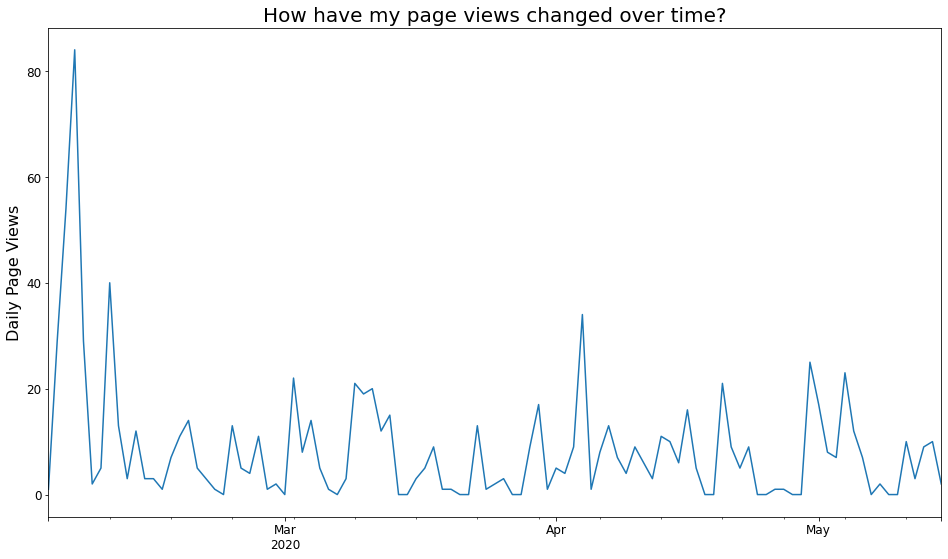

In [18]:
plt.figure(figsize=(16, 9))
me.resample('D').sum().page_visits.plot()
plt.ylabel('Daily Page Views', fontsize=16)
plt.title('How have my page views changed over time?', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)